
##   <span style="color:#00BCD4"> **Project : Building a Smart Book Recommendation System**</span> 

#### <span style="color:#00BCD4"> **Introduction**</span> 
In today’s data-driven world, delivering personalized book recommendations is key to enhancing user engagement. This project aims to design a robust recommender system for Book-Crossing by combining collaborative filtering, content-based analysis, and hybrid techniques. Below are the core objectives that will guide our implementation, from data preparation to real-time deployment, ensuring actionable insights and measurable success.  


### **Key Objectives**  
1. **Clean and explore the dataset** to handle missing values, standardize formats, and uncover insights about users, books, and ratings or give a pipeline approach for example ; **Establish a robust data pipeline** to ingest, clean, and structure raw user and book data for analysis and modeling. 

2. **Implement Collaborative Filtering**  
   - Build a model that identifies user preference patterns from ratings data.  

3. **Develop Content-Based Filtering**  
   - Leverage book metadata (author, genre) to recommend similar titles.  

4. **Create a Hybrid Recommendation Engine**  
   - Merge collaborative and content-based methods for balanced accuracy and diversity.  

5. **Optimize and Validate System Performance**  
   - Evaluate models using RMSE and precision, then fine-tune hyperparameters.  

6. **Deploy Real-Time Recommendations**  
   - Build a dynamic feature that updates suggestions based on new user interactions.  

##  <span style="color:#00BCD4"> **Data Understanding**</span> 

### Data Loading

In [96]:
import pandas as pd
import numpy as np

# Load each dataset (replace paths with your actual file paths)
books_df = pd.read_csv(r'N:\Moringa\afterM\Online book reco\Online-Book-Recommender-System\books_df.csv',sep=';',encoding='latin1',quotechar='"',on_bad_lines='skip',engine='python')
users_df = pd.read_csv(r'N:\Moringa\afterM\Online book reco\Online-Book-Recommender-System\user_df.csv', sep=';', encoding='latin1',  quotechar='"',on_bad_lines='skip', engine='python')
ratings_df = pd.read_csv(r'N:\Moringa\afterM\Online book reco\Online-Book-Recommender-System\ratings_df.csv', encoding='latin1', sep=';', quotechar='"',on_bad_lines='skip', engine='python')


#### Books Data

In [97]:
books_df.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


#### Users Data

In [98]:
users_df.head(3)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [99]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278177 entries, 0 to 278176
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278177 non-null  int64  
 1   Location  278177 non-null  object 
 2   Age       167669 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Ratings Data

In [100]:
ratings_df.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [101]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149766 entries, 0 to 1149765
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149766 non-null  int64 
 1   ISBN         1149766 non-null  object
 2   Book-Rating  1149766 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


#### Data Merging 

1. **Ratings + Books merge (on ISBN)**:
   - ISBN is the unique identifier for books
   - This attaches book metadata to each rating record
   - We use left join to keep all ratings even if book info is missing

In [102]:
# First merge: Ratings with Books (on ISBN)
merged_df = pd.merge(ratings_df, books_df, on='ISBN', how='left')

2. **Result + Users merge (on User-ID)**:
   - User-ID is the unique identifier for users
   - This attaches demographic info to each rating
   - Left join preserves all ratings even if user data is incomplete

In [103]:
# Second merge: Result with Users (on User-ID)
final_df = pd.merge(merged_df, users_df, on='User-ID', how='left')
df = final_df

### Data Inspection

In [104]:
df.head(3)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",NaN
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa",NaN
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,"h, new south wales, australia",16.0


##### Basic info about the merged dataframe

In [105]:
print("\nDataframe Info:")
print(df.info())


Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149766 entries, 0 to 1149765
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1149766 non-null  int64  
 1   ISBN                 1149766 non-null  object 
 2   Book-Rating          1149766 non-null  int64  
 3   Book-Title           1028713 non-null  object 
 4   Book-Author          1028711 non-null  object 
 5   Year-Of-Publication  1028713 non-null  float64
 6   Publisher            1028711 non-null  object 
 7   Image-URL-S          1028713 non-null  object 
 8   Image-URL-M          1028713 non-null  object 
 9   Image-URL-L          1028713 non-null  object 
 10  Location             1149558 non-null  object 
 11  Age                  840142 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 105.3+ MB
None


| <span style="color:#00BCD4">**Column Name**</span>          | <span style="color:#00BCD4">**Description**</span> |
|--------------------------|----------------|
| **User-ID**              | Unique identifier for each user |
| **ISBN**                 | International Standard Book Number identifying each book |
| **Book-Rating**          | Numeric rating given by user (scale 0-10) |
| **Book-Title**           | Title of the book |
| **Book-Author**          | Author(s) of the book |
| **Year-Of-Publication**  | Year the book was published |
| **Publisher**            | Company that published the book |
| **Image-URL-S**          | URL for small-sized book cover image |
| **Image-URL-M**          | URL for medium-sized book cover image |
| **Image-URL-L**          | URL for large-sized book cover image |
| **Location**             | User's location in "City, State, Country" format |
| **Age**                  | User's age in years |

##### Check for missing values

In [106]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
User-ID                     0
ISBN                        0
Book-Rating                 0
Book-Title             121053
Book-Author            121055
Year-Of-Publication    121053
Publisher              121055
Image-URL-S            121053
Image-URL-M            121053
Image-URL-L            121053
Location                  208
Age                    309624
dtype: int64


##### Summary statistics for numerical columns

In [107]:
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,User-ID,Book-Rating,Year-Of-Publication,Age
count,1.149766e+06,1.149766e+06,1.028713e+06,840142.000000
mean,1.403862e+05,2.866906e+00,1.968148e+03,37.239230
std,8.056191e+04,3.854172e+00,2.313042e+02,14.246607
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,7.034500e+04,0.000000e+00,1.992000e+03,28.000000
50%,1.410100e+05,0.000000e+00,1.997000e+03,35.000000
75%,2.110280e+05,7.000000e+00,2.001000e+03,45.000000
max,2.788540e+05,1.000000e+01,2.050000e+03,244.000000


##### Unique counts of important fields

In [108]:
print(f"Unique users: {df['User-ID'].nunique()}")
print(f"Unique books: {df['ISBN'].nunique()}")
print(f"Unique ratings: {df['Book-Rating'].nunique()}")

Unique users: 105274
Unique books: 340545
Unique ratings: 11


##  <span style="color:#00BCD4"> **Data Cleaning**</span> 

Validate ISBNs

In [109]:
# Get initial count
initial_count = len(df)

# Filter to keep only valid ISBNs
df = df[df['ISBN'].str.match(r'^\d{9}[\dX]$|^\d{13}$', na=False)]

# Calculate removed count
removed_count = initial_count - len(df)

print(f"Removed {removed_count} rows with invalid ISBNs")
print(f"Remaining valid ISBNs: {len(df)}")

Removed 10784 rows with invalid ISBNs
Remaining valid ISBNs: 1138982


The dataset was filtered to remove invalid ISBNs using pattern matching. ISBNs were considered valid if they matched either:
- **ISBN-10** format: Exactly 9 digits followed by a digit or 'X' (`^\d{9}[\dX]$`)
- **ISBN-13** format: Exactly 13 digits (`^\d{13}$`). 

A total of 10,784 records with invalid ISBN formats were removed from the dataset. This structural validation ensures all remaining ISBNs conform to standard length and character requirements.

Handle missing values

In [110]:
print("Missing values before treatment:")
print(df.isnull().sum())

Missing values before treatment:
User-ID                     0
ISBN                        0
Book-Rating                 0
Book-Title             110953
Book-Author            110955
Year-Of-Publication    110953
Publisher              110955
Image-URL-S            110953
Image-URL-M            110953
Image-URL-L            110953
Location                  198
Age                    306002
dtype: int64


In [111]:
# For age - impute with median by user location
def safe_fillna(x):
    """Handle empty groups gracefully"""
    if x.notna().any():  # Check if group has any non-NA values
        return x.fillna(x.median())
    return x.fillna(df['Age'].median())

df['Age'] = df.groupby('Location')['Age'].transform(safe_fillna)
# Keep only ages between 5 and 120 (adjust thresholds as needed)
df = df[(df['Age'] >= 5) & (df['Age'] <= 100)]

C:\Users\Mbego John\AppData\Local\Temp\ipykernel_12400\2151335730.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df.groupby('Location')['Age'].transform(safe_fillna)


Book-Related Missing Data 

In [112]:
# Check if missing values coincide
book_missing = df[['Book-Title', 'Book-Author', 'Year-Of-Publication']].isna().all(axis=1).sum()
print(f"Number of rows with all book info missing: {book_missing}")

Number of rows with all book info missing: 109101


Since this represent invalid book entries and are not critical to the analysis, We choose to drop, we cannot have Unknown title or Auuthor.

In [113]:
df = df.dropna(subset=['Book-Title', 'Book-Author', 'Year-Of-Publication'], how='any')

Image URL Missing Data

These are likely the same records as above and may not be critical for analysis (they are urls and only additional metadata)

In [114]:
# drop with the book info 
df = df.dropna(subset = ['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], how= 'all')

YoP , Publisher and Loaction

In [115]:
# Fill less critical missing values
df['Year-Of-Publication'] = df['Year-Of-Publication'].fillna(0)
df['Publisher'] = df['Publisher'].fillna('Unknown Publisher')
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])

In [116]:
print("Missing values after treatment:")
print(df.isna().sum())

Missing values after treatment:
User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
Location               0
Age                    0
dtype: int64


##  <span style="color:#00BCD4"> **Exploratory Data Analysis**</span> 

 <span style="color:#00BCD4"> **Univariate Analysis**</span>

**Visualize Age Distribution**

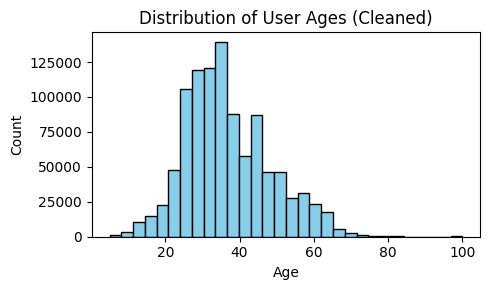

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))  # Compact size
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of User Ages (Cleaned)')
plt.tight_layout()
plt.show()

**Book-Rating**

*Analyze distribution*

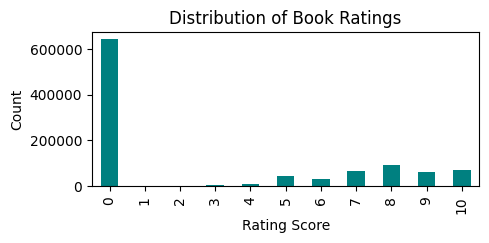

Mean rating: 2.84
Rating skew: 0.75


In [118]:
# Distribution of ratings
plt.figure(figsize=(5, 2))
df['Book-Rating'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating Score')
plt.ylabel('Count')
plt.show()

# Stats
print(f"Mean rating: {df['Book-Rating'].mean():.2f}")
print(f"Rating skew: {df['Book-Rating'].skew():.2f}")  # Check for bias (e.g., left-skewed = high-rating dominance)

**User Demographics**

*Top 10 Countries*

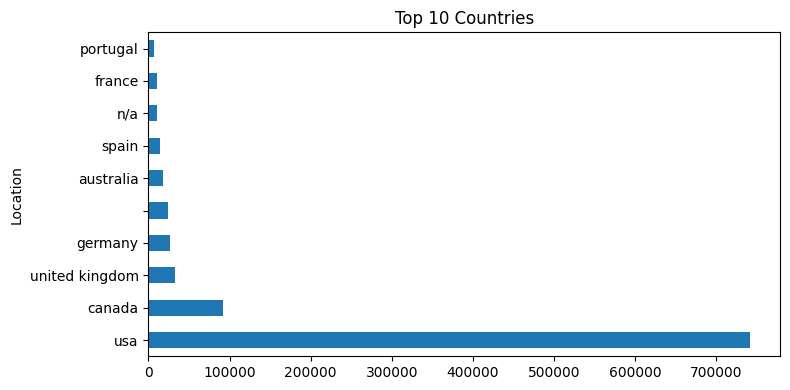

In [119]:
plt.figure(figsize=(8, 4))
df['Location'].str.split(',').str[-1].str.strip().value_counts().head(10).plot(
    kind='barh', 
    colormap='tab10'
)
plt.title('Top 10 Countries')
plt.tight_layout()
plt.show()

**Book Publication Years**

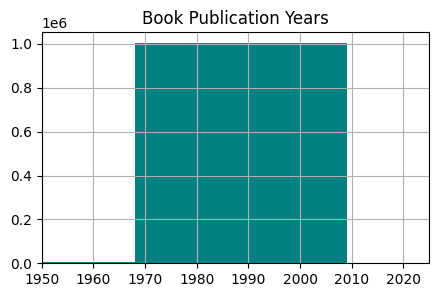

In [120]:
# Publication year trends
plt.figure(figsize=(5, 3))
df['Year-Of-Publication'].hist(bins=50, color='teal')
plt.title('Book Publication Years')
plt.xlim(1950, 2025)  # Filter outliers
plt.show()


<span style="color:#00BCD4"> **Bivariate Analysis**</span>

**Comparing Top Authors by Average Rating and Review Count**

- Introduction  
This visualization compares the top authors based on two key metrics:  
- **Average Rating** (blue bars) - Represents the authors' average book ratings  
- **Scaled Review Count** (orange bars) - Shows the relative popularity by normalizing review counts (If a author has rcount 50 means he was rated by 50 users) 

The horizontal bar chart enables easy comparison between author quality (ratings) and engagement (reviews). The review counts are scaled to fit the same range as ratings (1-10 scale) for clearer visual comparison.  


In [121]:
# Get top 10 authors
#top10 = top_authors.sort_values('avg_rating', ascending=False).head(10)

#fig, ax = plt.subplots(figsize=(10, 5))
#bar_pos = range(len(top10))
#width = 0.3
#ax.barh(bar_pos, top10['avg_rating'], width, color='#1f77b4', label='Avg Rating')
#ax.barh([p + width for p in bar_pos], 
        #top10['review_count']/top10['review_count'].max()*10, 
        #width, color='#ff7f0e', label='Review Count (scaled)')

#for i, (rating, count) in enumerate(zip(top10['avg_rating'], top10['review_count'])):
    #ax.text(rating + 0.1, i, f"{rating:.1f}", va='center', color='#1f77b4')
    #ax.text(count/top10['review_count'].max()*10 + 0.1, i + width, 
            #f"{count:,}", va='center', color='#ff7f0e')

#ax.set(xlabel='Score', title='Top 10 Authors: Rating vs Reviews',
       #yticks=[p + width/2 for p in bar_pos],
       #yticklabels=[name[:20] + ('...' if len(name)>20 else '') for name in top10.index])
#ax.legend(loc='lower right')
#plt.tight_layout()
#plt.show()

**Most frequently reviewed books**

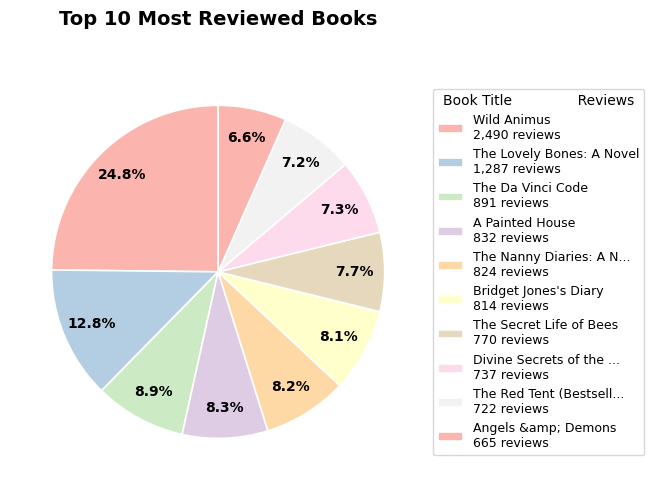

In [122]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

top_books = df['Book-Title'].value_counts().head(10)

plt.figure(figsize=(8, 5))  # Optimal width-to-height ratio

wedges, texts, autotexts = plt.pie(top_books,autopct=lambda p: f'{p:.1f}%',startangle=90,colors=plt.cm.Pastel1.colors,wedgeprops={'linewidth': 1.2, 'edgecolor': 'white'},textprops={'fontsize': 10, 'fontweight': 'bold'},pctdistance=0.82, labeldistance=1.05  # Slight outward shift for visibility
)

# 4. Professional title and legend
plt.title('Top 10 Most Reviewed Books\n',fontsize=14,pad=12,fontweight='bold')

legend = plt.legend(wedges,
    [f"{title[:22] + '...' if len(title) > 25 else title}\n{count:,} reviews" 
     for title, count in top_books.items()],title="Book Title               Reviews",loc='center left',bbox_to_anchor=(1, 0.5),fontsize=9,framealpha=0.9,edgecolor='lightgray')
plt.subplots_adjust(left=0.1, right=0.75)  # Precise whitespace control
plt.tight_layout()
plt.show()

## <span style="color:#00BCD4"> **Data preprocessing**</span> 

#### **Dropping Unnecessary Columns**

The image URLs (columns 7,8,9) are unnecessary for modeling as they don't contribute to recommendation logic. We'll choose to drop them, 

In [123]:
df = df.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1)

#### **Feature Engineering**

##### Relevant additional features for a recommender system

book-level features

In [124]:
df['Publication-Decade'] = (df['Year-Of-Publication'] // 10) * 10

##### Extract country from Location

In [125]:
df['Country'] = df['Location'].apply(lambda x: x.split(',')[-1].strip())

##### Age grouping

- Simplifies Age Analysis:

- Groups users into meaningful segments (e.g., teens might prefer YA fiction, seniors might prefer classics).

In [126]:
df['Age-Group'] = pd.cut(df['Age'], bins=[0, 12, 19, 30, 50, 100], 
                         labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'], right=False)

##### Extract country from Location (for demographic-based recommendations)

In [127]:
df['Country'] = df['Location'].str.split(',').str[-1].str.strip()

##### Book features (popularity, author reputation)

- If book ISBN=123 was rated by 50 users, its Popularity value will be 50.
- Popularity helps identify trending or widely read books (e.g., for "Top Picks" recommendations)

In [128]:
# Calculate book popularity (total ratings),,
book_popularity = df.groupby('ISBN')['Book-Rating'].count().reset_index()
book_popularity.columns = ['ISBN', 'Popularity']

# Merge feature back to main dataframe
df = df.merge(book_popularity, on='ISBN', how='left')
df['Popularity'] = df['Popularity'].fillna(0)

Calculate Average Rating per Book

- If book ISBN=456 has ratings [5, 4, 3], its Avg_Rating will be 4.0.
- Average rating reflects perceived quality (e.g., for "Highest Rated" recommendations).

In [129]:
# Calculate average rating per book
avg_rating = df.groupby('ISBN')['Book-Rating'].mean().reset_index()
avg_rating.columns = ['ISBN', 'Avg_Rating']

# Merge feature back to main dataframe
df = df.merge(avg_rating, on='ISBN', how='left')
df['Avg_Rating'] = df['Avg_Rating'].fillna(df['Avg_Rating'].mean())

##### Comprehensive User Profile Engineering

- we now engineer user profile features to enable personalized recommendation

This helps by:

- Quantifies reading behaviors (rating patterns, engagement levels)

- Captures demographic signals (age groups, geographic location)

- Models temporal preferences (era-specific reading tendencies)

- Creates interaction metrics (how users engage with book popularity/quality)

In [130]:
# Enhanced User Profile Features with your current columns
user_stats = df.groupby('User-ID').agg({
    # Rating behavior metrics
    'Book-Rating': ['count', 'mean', 'std'],
    # Temporal preferences using both year and decade
    'Year-Of-Publication': ['mean', 'min', 'max'],
    'Publication-Decade': ['mean', lambda x: x.mode()[0]],  # Most common decade
    # Demographic features
    'Age': 'first',
    'Age-Group': 'first',
    'Country': 'first',
    # Interaction metrics
    'Popularity': ['mean', 'max'],  # Avg and max popularity of books rated
    'Avg_Rating': ['mean', 'min']   # Avg and min quality of books rated
})

# Flatten multi-index columns and rename meaningfully
user_stats.columns = [
    # Rating behavior
    'user_total_ratings', 'user_avg_rating', 'user_rating_stddev',
    # Temporal preferences - year
    'user_avg_pub_year', 'user_min_pub_year', 'user_max_pub_year',
    # Temporal preferences - decade
    'user_avg_pub_decade', 'user_most_common_decade',
    # Demographics
    'user_age', 'user_age_group', 'user_country',
    # Interaction metrics
    'user_avg_book_popularity', 'user_max_book_popularity',
    'user_avg_book_quality', 'user_min_book_quality'
]

# Merge back to main dataframe
df = df.merge(user_stats, on='User-ID', how='left')

# Create powerful derived features
df['user_preference_recency'] = df['Year-Of-Publication'] - df['user_avg_pub_year']
df['user_rating_generosity'] = df['Book-Rating'] - df['Avg_Rating']
df['user_decade_match'] = (df['Publication-Decade'] == df['user_most_common_decade']).astype(int)

# Add engagement tier based on rating count percentiles
rating_percentiles = df['user_total_ratings'].quantile([0.33, 0.66]).values
df['user_engagement_tier'] = pd.cut(df['user_total_ratings'],
                                   bins=[0, rating_percentiles[0], rating_percentiles[1], float('inf')],
                                   labels=['casual', 'active', 'power'])

#### Feature Selection

In [131]:
# Categorize features for easier management
user_features = [
    'user_total_ratings', 'user_avg_rating', 'user_rating_stddev',
    'user_avg_pub_year', 'user_age', 'user_age_group',
    'user_country', 'user_avg_book_popularity', 'user_engagement_tier'
]

book_features = [
    'Book-Title', 'Book-Author', 'Publisher', 'Year-Of-Publication',
    'Publication-Decade', 'Popularity', 'Avg_Rating'
]

interaction_features = [
    'User-ID', 'ISBN', 'Book-Rating',
    'user_decade_match', 'user_preference_recency'
]

# Select most impactful features (remove redundant ones)
# Updated final features with Book-Title included
final_features = [
    # Core identifiers
    'User-ID', 'ISBN', 'Book-Rating', 'Book-Title',  # Added Book-Title here
    
    # Important user traits
    'user_avg_rating', 'user_age_group', 'user_country', 'user_engagement_tier',
    
    # Important book traits
    'Book-Author', 'Publisher', 'Publication-Decade', 'Avg_Rating',
    
    # Interaction features
    'user_decade_match', 'user_preference_recency'
]

df_modelling = df[final_features]


These features will feed into recommendation algorithms ie collaborative filtering, content-based, and hybrid models

..............Modelling...........

---

**Content-Based Recommender (Using Book Features)**

In [ ]:
def content_based_recommend(isbn, n=5):
    """
    Recommends similar books based on content features.
    Returns a DataFrame with available book information.
    """
    # First, check what columns are available for output
    available_columns = []
    for col in ['ISBN', 'Book-Title', 'Title', 'Book-Author', 'Publisher']:
        if col in df.columns:
            available_columns.append(col)
    
    if not available_columns:
        raise ValueError("No valid columns found in DataFrame for output")
    
    # Combine features into text
    df['content_features'] = (
        df['Book-Author'] + ' ' + 
        df['Publisher'] + ' ' +
        df['Publication-Decade'].astype(str) + ' ' +
        df['user_country'] + ' ' +
        df['user_engagement_tier'].astype(str)
    )
    
    # TF-IDF Vectorization
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(df['content_features'])
    
    # Get similarity scores
    try:
        idx = df.index[df['ISBN'] == isbn].tolist()[0]
    except IndexError:
        raise ValueError(f"ISBN {isbn} not found in dataset")
    
    sim_scores = cosine_similarity(tfidf_matrix[idx], tfidf_matrix)
    
    # Get top N similar books (excluding itself)
    similar_books = list(enumerate(sim_scores[0]))
    similar_books = sorted(similar_books, key=lambda x: x[1], reverse=True)[1:n+1]
    
    # Return recommendations with available columns
    return df.iloc[[i[0] for i in similar_books]][available_columns]

In [133]:
# Usage
content_based_recommend(isbn='0195153448')  

,ISBN,Book-Title,Book-Author,Publisher
149547,0582280044,Classical mythology,Mark P.O Morford,Longman
233293,0582280044,Classical mythology,Mark P.O Morford,Longman
518739,0801304652,Classical mythology,Mark P. O Morford,Longman
1001309,0801319536,Classical Mythology,Mark P. O. Morford,John Wiley &amp; Sons
322957,0198606362,Concise Oxford English Dictionary (Thumb Index...,Oxford University Press,Oxford University Press


---